# Import

In [2]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys

from sklearn.preprocessing import StandardScaler

/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

# Be sure to used Tensorflow 2.0

In [3]:
assert hasattr(tf, "function") # Be sure to use tensorflow 2.0

# Load the dataset: Fashion MNIST

In [7]:
from sklearn.model_selection import train_test_split # Create testing data

# Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
# Get only images and targets
(images, targets), (_, _) = fashion_mnist.load_data()

# Get only a subpart of the dataset
images = images[:10000]
targets = targets [:10000]

#print(images.shape)
#print(targets.shape)

#print(images.mean())
#print(images.std())

# Flatten - avoid scale effects
images = images.reshape(-1, 784)
images = images.astype(float)
scaler = StandardScaler()
images = scaler.fit_transform(images)

# Mean after flatting
#print(images.mean())
#print(images.std())

# Create test data from initial data - Here 20%
images_train, images_test, targets_train, targets_test = train_test_split(images, targets, test_size=0.2, random_state=1)

print(images_train.shape, targets_train.shape)
print(images_test.shape, targets_test.shape)

(8000, 784) (8000,)
(2000, 784) (2000,)


# Plot one of the data

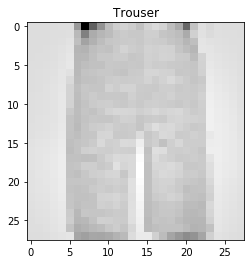

In [8]:
# Associate targets results to names
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Plot one image with lib mathplot
#plt.imshow(images[8], cmap="binary")
plt.imshow(images_train[10].reshape(28, 28), cmap="binary")
plt.title(targets_names[targets_train[10]])
plt.show()

In [9]:
print("First line of one image", images_train[11][0])
print("Associated target", targets_train[11])

First line of one image -0.0142697062475628
Associated target 0


# Model

## Flatten the image

In [5]:
# Create the model - Before StandardScaler
#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten(input_shape=[28, 28])) # Job done by StandardScaler

#print("Shape of the image", images[0:1].shape)
#model_output = model.predict(images[0:1])
#print("Shape of the image after the Flatten", model_output.shape)

## Add the layers

In [11]:
# Flatten
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

# Add the layers
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax")) # Output : probabilities

model_output = model.predict(images_train[0:1])
print(model_output, targets_train[0:1])

[[0.06519195 0.1316506  0.08237959 0.06669563 0.27802488 0.06741281
  0.19283307 0.03116584 0.03173866 0.05290695]] [3]


## Summary

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  200960    
_________________________________________________________________
dense_1 (Dense)              multiple                  32896     
_________________________________________________________________
dense_2 (Dense)              multiple                  1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## Compile

In [9]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy", # Error function
    optimizer="sgd",
    metrics=["accuracy"]
)

# Caterogical cross entropy

In [10]:
images_test = images[:5]
labels_test = targets[:5]

print(images_test.shape)
print(labels_test)

outputs_test = model.predict(images_test)

print(outputs_test.shape)
print("Output", outputs_test)

#print("\nLabels", labels_test)

filtered_outputs_test = outputs_test[np.arange(5), labels_test]
print("\nFiltered output", filtered_outputs_test)

log_filtered_output = np.log(filtered_outputs_test)
print("\nLog Filtered output", log_filtered_output)

print("Mean", log_filtered_output.mean())
print("Mean", -log_filtered_output.mean()) # Goal : minimize the mean

(5, 784)
[9 0 0 3 0]
(5, 10)
Output [[0.1225259  0.10319048 0.01704594 0.0194598  0.01117472 0.03433904
  0.21798478 0.25462574 0.02192188 0.19773172]
 [0.17838722 0.08751429 0.03104112 0.00978137 0.05947465 0.06234976
  0.3069002  0.09471993 0.01267055 0.15716086]
 [0.1025409  0.04463207 0.05325823 0.04216272 0.17033793 0.11609512
  0.16585451 0.06158426 0.02245774 0.22107652]
 [0.20653987 0.02808458 0.03492594 0.04255745 0.12985043 0.1320749
  0.10677923 0.10189682 0.02058069 0.19670998]
 [0.13406274 0.04611738 0.02932574 0.03640248 0.0750052  0.07445394
  0.08247168 0.31992683 0.07608268 0.1261513 ]]

Filtered output [0.19773172 0.17838722 0.1025409  0.04255745 0.13406274]

Log Filtered output [-1.6208441 -1.7237986 -2.2774935 -3.1569004 -2.0094473]
Mean -2.1576967
Mean 2.1576967


## Train

In [11]:
#history = model.fit(images_train, targets_train, epochs=10) #Without validation data
history = model.fit(images_train, targets_train, epochs=5, validation_split=0.2)

Train on 6400 samples, validate on 1600 samples
Epoch 1/5
6400/6400 [==============================] - 1s 113us/sample - loss: 0.9522 - acc: 0.6848 - val_loss: 0.6750 - val_acc: 0.7619
Epoch 2/5
6400/6400 [==============================] - 1s 103us/sample - loss: 0.5578 - acc: 0.8052 - val_loss: 0.5678 - val_acc: 0.7900
Epoch 3/5
6400/6400 [==============================] - 1s 95us/sample - loss: 0.4655 - acc: 0.8384 - val_loss: 0.5170 - val_acc: 0.8119
Epoch 4/5
6400/6400 [==============================] - 1s 95us/sample - loss: 0.4139 - acc: 0.8605 - val_loss: 0.4959 - val_acc: 0.8231
Epoch 5/5
6400/6400 [==============================] - 1s 98us/sample - loss: 0.3764 - acc: 0.8744 - val_loss: 0.4774 - val_acc: 0.8256


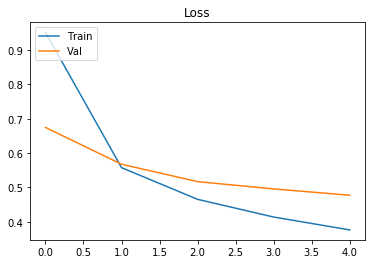

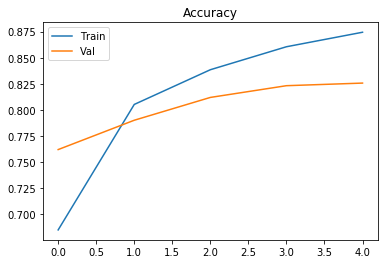

In [12]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

## Save

In [10]:
# sudo pip install h5py
#model.save('simple_nn.h5')

# Load the savec model
loaded_model = tf.keras.models.load_model("simple_nn.h5")
#loss, acc = loaded_model.evaluate(images_test, targets_test)
print(loaded_model.predict(images_test[:1]), targets_test[0:1])

#print("Loss", loss)
#print("Acc", acc)

[[8.45589791e-04 9.97190058e-01 2.57331012e-05 1.40848721e-03
  4.63064003e-04 9.36128401e-07 1.72175696e-05 1.26903915e-05
  3.27906673e-05 3.48696676e-06]] [1]
